In [1]:
# -*-coding:utf-8 -*-
# Edited by bighead 19-2-21

import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform: Linux-4.18.0-15-generic-x86_64-with-Ubuntu-18.10-cosmic
Tensorflow version: 1.12.0
Keras version: 2.2.4


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 541,794
Trainable params: 541,794
Non-trainable params: 0
_________________________________________________________________


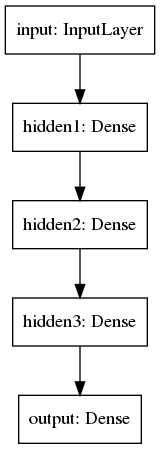

In [3]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.utils import plot_model

### multilayer_perceptron
mnist_input = Input(shape=(784,), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(mnist_input)
hidden2 = Dense(216, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
output = Dense(10, activation='softmax', name='output')(hidden3)

model = Model(inputs=mnist_input, outputs=output)
model.summary()

plot_model(model, to_file='multilayer_perceptron_graph.png')

Image("multilayer_perceptron_graph.png")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650       
Total para

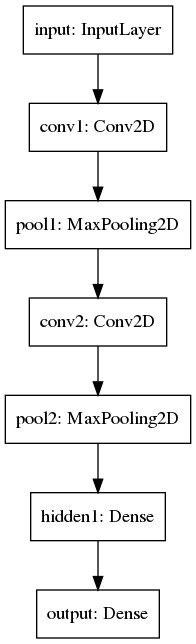

In [7]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import plot_model

mnist_input = Input(shape=(28, 28, 1), name='input')

conv1 = Conv2D(128, kernel_size=4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2,2), name='pool1')(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2,2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
output = Dense(10, activation='softmax', name='output')(hidden1)

model = Model(inputs=mnist_input, outputs=output)
model.summary()

plot_model(model, to_file='convolutional_neural_network.png')

Image('convolutional_neural_network.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784, 1)            0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 128)               66560     
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 84,362
Trainable params: 84,362
Non-trainable params: 0
_________________________________________________________________


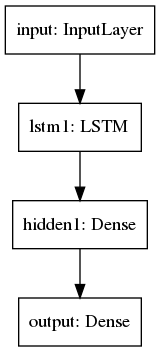

In [9]:
### LSTM
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input')
lstm1 = LSTM(128, name='lstm1')(mnist_input)
hidden1 = Dense(128, activation='relu', name='hidden1')(lstm1)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)

model.summary()
plot_model(model, to_file='LSTM.png')

Image('LSTM.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (Max

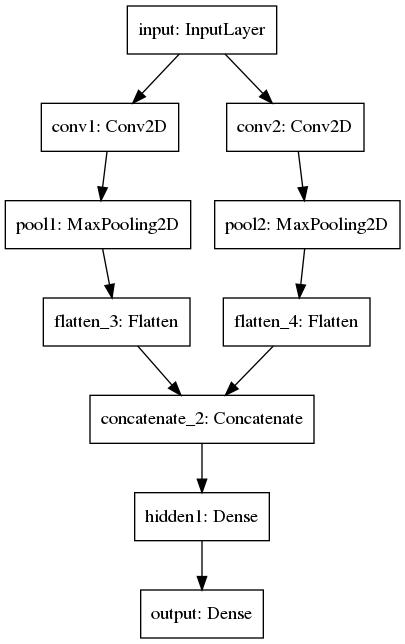

In [11]:
# share input layer
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

#input
mnist_input = Input(shape=(28, 28, 1), name='input')

# first feature layer
conv1 = Conv2D(32, kernel_size=4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = Flatten()(pool1)

# second feature layer
conv2 = Conv2D(16, kernel_size=8, activation='relu', name='conv2')(mnist_input)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

merge = concatenate([flat1, flat2])

hidden1 = Dense(64, activation='relu', name='hidden1')(merge)
output = Dense(10, activation='softmax', name='output')(hidden1)

model = Model(inputs=mnist_input, outputs=output)

model.summary()
plot_model(model, to_file='shared_input_layer.png')

Image('shared_input_layer.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 128)          66560       input[0][0]                      
__________________________________________________________________________________________________
interp21 (Dense)                (None, 64)           8256        lstm1[0][0]                      
__________________________________________________________________________________________________
interp22 (Dense)                (None, 32)           2080        interp21[0][0]                   
__________________________________________________________________________________________________
interp1 (D

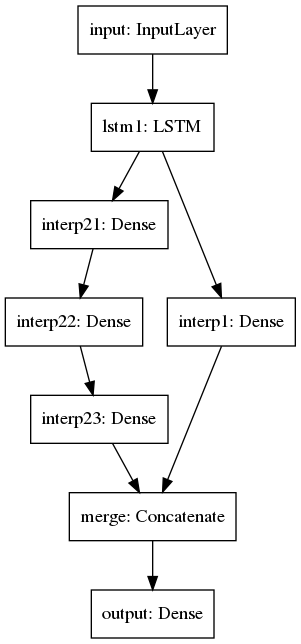

In [12]:
# shared feature extractor
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input')

### get feature
extract1 = LSTM(128, name='lstm1')(mnist_input)

# first
interp1 = Dense(10, activation='relu', name='interp1')(extract1)

# second
interp21 = Dense(64, activation='relu', name='interp21')(extract1)
interp22 = Dense(32, activation='relu', name='interp22')(interp21)
interp23 = Dense(16, activation='relu', name='interp23')(interp22)

### merge
merge = concatenate([interp1, interp23], name='merge')

### output
output = Dense(10, activation='softmax', name='output')(merge)

### model
model = Model(inputs=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='shared_feature_extractor.png')

Image('shared_feature_extractor.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)  (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_smallsize[0][0]          
__________________________________________________________________________________________________
pool11 (Ma

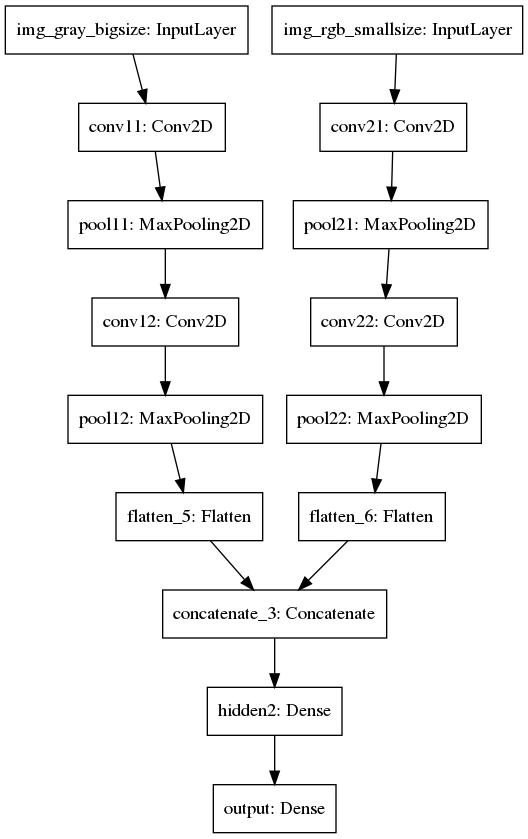

In [13]:
### multiple_inputs
from keras.models import Model
from keras.layers import Dense, Input, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

### first input
img_gray_bigsize = Input(shape=(64,64,1), name='img_gray_bigsize')
conv11 = Conv2D(32, kernel_size=4, activation='relu', name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2,2), name='pool11')(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2,2), name='pool12')(conv12)
flat1 = Flatten()(pool12)

### second input
img_rgb_smallsize = Input(shape=(32,32,3), name='img_rgb_smallsize')
conv21 = Conv2D(32, kernel_size=4, activation='relu', name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2,2), name='pool21')(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2,2), name='pool22')(conv22)
flat2 = Flatten()(pool22)

### merge
merge = concatenate([flat1, flat2])

### hidden
hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(merge)

### output
output = Dense(10, activation='softmax', name='output')(hidden2)

### model
model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)

### summary
model.summary()

### plot
plot_model(model, to_file='multiple_inputs.png')

### 
Image('multiple_inputs.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
extract (LSTM)                  (None, 784, 64)      16896       input[0][0]                      
__________________________________________________________________________________________________
class11 (LSTM)                  (None, 32)           12416       extract[0][0]                    
__________________________________________________________________________________________________
class12 (Dense)                 (None, 32)           1056        class11[0][0]                    
__________________________________________________________________________________________________
output1 (D

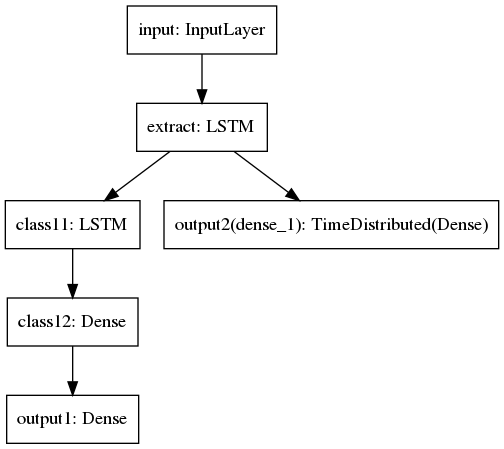

In [14]:
#### multiple_outputs
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.utils import plot_model

### input
mnist_input = Input(shape=(784, 1), name='input')

###
extract = LSTM(64, return_sequences=True, name='extract')(mnist_input)

### class output
class11 = LSTM(32, name='class11')(extract)
class12 = Dense(32, activation='relu', name='class12')(class11)
output1 = Dense(10, activation='softmax', name='output1')(class12)

### seq output
output2 = TimeDistributed(Dense(10, activation='softmax'), name='output2')(extract)

### model
model = Model(inputs=mnist_input, outputs=[output1, output2])

### summary
model.summary()

### plot
plot_model(model, to_file='multiple_outputs.png')

### image
Image('multiple_outputs.png')